In [57]:
import pandas as pd 
import numpy as np
import tweepy
from tweepy import OAuthHandler 
from timeit import default_timer as timer
import requests
import json
import datetime
import matplotlib.pyplot as plt
import seaborn as sb 

%matplotlib inline

In [2]:
auth = tweepy.OAuthHandler('gkP7m77Dh1ZJ7Sa2RbIe9efbm', 'VDXb4Rd8PleTtqx7RUnC5yAXEO30BJauxucy51UhnM8CkE6uO2')
auth.set_access_token('248792425-1PBfRxNX1OV6ieDI2ZBNNxPRz1IhzP5b75V8wx6s', 'm4r7fYgXIUErPv33n3MYducYFv1kpi6uTOQwhdOEjMYsm')

api = tweepy.API(auth, wait_on_rate_limit=True)

In [3]:
df_1 = pd.read_csv('./twitter-archive-enhanced-2.csv')

In [4]:
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

2356

In [ ]:
count = 0
fails_dict = {}
start = timer()

In [ ]:
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1 
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except :
            print("Fail")
            fails_dict[tweet_id]
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# Downloading image-predictions table
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [6]:
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [7]:
# Reading the image-predications table into a dataframe
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [8]:
# using python code to to read the 'tweet_json.txt' file line by line into a dataframe
data =[]
for line in open('tweet-json.json', 'r'):
    data.append(json.loads(line))

In [9]:
tweet_json=pd.DataFrame(data)

In [10]:
twitter_archive = pd.read_csv('./twitter-archive-enhanced-2.csv')

# Visually Assessing the gathered data

In [11]:
# visually assessing the 'image_predictions' table
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
# checking data types for different columns within the 'image_predictions' table
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# checking for the numbers of rows and columns within the 'image_predictions' table
image_predictions.shape

(2075, 12)

In [14]:
# visually assessing the 'tweet_json' table
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [15]:
# checking data types for different columns within the 'tweet_json' table
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [16]:
# checking for the numbers of rows and columns within the 'tweet_json' table
tweet_json.shape

(2354, 31)

In [17]:
# visually assessing the 'twitter_archive' table
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [18]:
# checking data types for different columns within the 'twitter_archive' table
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
# checking for the numbers of rows and columns within the 'twitter_archive' table
twitter_archive.shape

(2356, 17)

In [20]:
# checking for NaN values in all the tables 
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [21]:
tweet_json.isnull().sum()

created_at                          0
id                                  0
id_str                              0
full_text                           0
truncated                           0
display_text_range                  0
entities                            0
extended_entities                 281
source                              0
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
in_reply_to_screen_name          2276
user                                0
geo                              2354
coordinates                      2354
place                            2353
contributors                     2354
is_quote_status                     0
retweet_count                       0
favorite_count                      0
favorited                           0
retweeted                           0
possibly_sensitive                143
possibly_sensitive_appealable     143
lang        

In [22]:
image_predictions.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

### Quality issues

#### `twitter archive` table

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp, expanded_urls columns all have NaN/missing values
- tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp, columns all have wrong datatypes
- row 1515 under the 'expanded_url' column within the twitter archive table has a url that isn't related to or connected to twitter
- name,doggo,floofer,pupper,puppo columns have some values represented as 'None' instead of 'NaN' to indicate that no data is available or was given for that field
- 'tweet_id' column in 'image_prediction' and 'twitter_archive' table is the same with 'id' in 'tweet_json' table
- 'retweeted_status_id','retweeted_status_user_id', & 'retweeted_status_timestamp' shoud all be removed from the 'twitter archive' table to avoid tweet recounts

#### `twitter json` table

- extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,possibly_sensitive,possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status columns all have NaN/missing values
- created_at,id,in_reply_to_status_id,quoted_status_id,id columns all have wrong data types
- some rows (e.g 108,580,893) under the 'retweeted_status' column have values that should be in the 'created_at' column


#### `image_predictions` table

tweet_id column has a wrong data type

### Tideness Issues 
- Dog stages need to be combined into one column
- 'display_text_range' column within the twitter_api table has two variables for text range that should each have a seperate column 


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
image_predictions_clean = image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()
tweet_json_clean = tweet_json.copy()

## Issue #1: Wrong Values



#### `twitter archive` table 

- Row 1515 under the 'expanded_url' column within the twitter archive table has a url that isn't related to or connected to twitter

#### `twitter json` table

- Some rows (e.g 108,580,893) under the 'retweeted_status' column have values that should be in the 'created_at' column

#### Define 

- Change the identified values to 'NaN' within the applicable rows in the retweeted_status & expanded_url column 

#### Code

In [24]:
mask=~twitter_archive_clean['expanded_urls'].isna() & twitter_archive_clean['expanded_urls'].str.contains('https://vine.co/v/iOZKZEU2nHq')

twitter_archive_clean.loc[mask]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,NaN,NaN,NaN,https://vine.co/v/iOZKZEU2nHq,12,10,None,None,None,None,None


In [25]:
twitter_archive_clean.loc[mask,'expanded_urls']=np.nan

In [26]:
twitter_archive_clean.loc[mask,'expanded_urls']=np.nan

In [27]:
twitter_archive_clean.loc[mask,'expanded_urls']

1515    NaN
Name: expanded_urls, dtype: object

In [28]:
tweet_json_clean.loc[tweet_json_clean.index[108], 'retweeted_status'] = 'NaN'
tweet_json_clean.loc[tweet_json_clean.index[580], 'retweeted_status'] = 'NaN'
tweet_json_clean.loc[tweet_json_clean.index[893], 'retweeted_status'] = 'NaN'

#### Test

In [29]:
twitter_archive_clean.iloc[[1515]]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1515,690989312272396288,NaN,NaN,2016-01-23 20:07:44 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",We've got a doggy down. Requesting backup. 12/...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [30]:
tweet_json_clean.iloc[[108,580,893]]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
108,Sun Jun 04 00:46:17 +0000 2017,871166179821445120,871166179821445120,RT @dog_rates: This is Dawn. She's just checki...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,NaN,NaN,en,NaN,NaN,NaN,NaN
580,Sun Nov 20 21:00:48 +0000 2016,800443802682937345,800443802682937345,RT @dog_rates: This is Sampson. He's about to ...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776113296390942720, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,en,NaN,NaN,NaN,NaN
893,Fri Jul 29 22:53:27 +0000 2016,759159934323924993,759159934323924993,RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 ht...,False,"[0, 64]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 670319122597543936, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,False,False,en,NaN,NaN,NaN,NaN


## Issue #2: Missing Data 

`twitter_archive`: in_reply_to_status_id, in_reply_to_user_id,expanded_urls columns all have NaN/missing values

 `tweet json` :extended_entities,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,geo,coordinates,place,contributors,possibly_sensitive,possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status columns all have NaN/missing values

#### Define

Replace missing/NaN values with 0

#### Code

In [72]:
twitter_archive_clean.fillna(0, inplace = True)

In [73]:
tweet_json_clean.fillna(0, inplace = True)

#### Test

In [33]:
twitter_archive_clean.isnull().sum()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [34]:
tweet_json_clean.isnull().sum()

created_at                       0
id                               0
id_str                           0
full_text                        0
truncated                        0
display_text_range               0
entities                         0
extended_entities                0
source                           0
in_reply_to_status_id            0
in_reply_to_status_id_str        0
in_reply_to_user_id              0
in_reply_to_user_id_str          0
in_reply_to_screen_name          0
user                             0
geo                              0
coordinates                      0
place                            0
contributors                     0
is_quote_status                  0
retweet_count                    0
favorite_count                   0
favorited                        0
retweeted                        0
possibly_sensitive               0
possibly_sensitive_appealable    0
lang                             0
retweeted_status                 0
quoted_status_id    

## Issue #3: Wrong Datatypes
- `twitter archive table` : tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp, columns all have wrong datatypes
- `twitter json table` : created_at,id,in_reply_to_status_id,quoted_status_id,id columns all have wrong data types

#### Define: 
Convert all the listed wrong datatypes to string & timestamp using the astype & pd.to_datetime method

#### Code

In [35]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype(str)
tweet_json_clean['in_reply_to_status_id'] = tweet_json_clean['in_reply_to_status_id'].astype(str)
tweet_json_clean['created_at'] = pd.to_datetime(tweet_json_clean['created_at']) 
tweet_json_clean['id'] = tweet_json_clean['id'].astype(str)
tweet_json_clean['quoted_status_id'] = tweet_json_clean['quoted_status_id'].astype(str)
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   float64            
 7   retweeted_status_user_id    2356 non-null   float64            
 8   retweeted_status_timestamp  2356 non-null   object             
 9   expanded_urls               2356 non-null   object             
 10  rating_numerator            2356 non-null   int64           

In [37]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   object             
 2   id_str                         2354 non-null   object             
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2354 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          2354 non-null   object             
 10  in_reply_to_status_id_st

In [38]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Issue #4 : Retweets Counts

- `twitter_archive` :  'retweeted_status_id','retweeted_status_user_id', & 'retweeted_status_timestamp' shoud all be removed from the 'twitter archive' table to avoid tweet recounts

#### Define 

Remove all the listed columns using the drop method from the 'twitter_archive' table.

#### Code 

In [39]:
twitter_archive_clean.drop(columns = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],
                          axis = 1, inplace = True)

#### Test

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2356 non-null   object             
 1   in_reply_to_status_id  2356 non-null   object             
 2   in_reply_to_user_id    2356 non-null   object             
 3   timestamp              2356 non-null   datetime64[ns, UTC]
 4   source                 2356 non-null   object             
 5   text                   2356 non-null   object             
 6   expanded_urls          2356 non-null   object             
 7   rating_numerator       2356 non-null   int64              
 8   rating_denominator     2356 non-null   int64              
 9   name                   2356 non-null   object             
 10  doggo                  2356 non-null   object             
 11  floofer                2356 non-null   object           

## Issue #5

name,doggo,floofer,pupper,puppo columns have some values represented as 'None' instead of 'NaN' to indicate that no data is available or was given for that field

#### Define 

Replace all the 'None' values with empty string

#### Code

In [41]:

twitter_archive_clean.doggo.replace('None', '', inplace=True) and twitter_archive_clean.doggo.replace(np.NaN, '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True) and twitter_archive_clean.floofer.replace(np.NaN, '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True) and twitter_archive_clean.pupper.replace(np.NaN, '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True) and twitter_archive_clean.puppo.replace(np.NaN, '', inplace=True)

#### Test

In [42]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,


## Issue #6

Dog stages need to be combined into one column

#### Define 

Rather than having one column for each dog stage, combine them into a single column e.g. "stage" column where the value could be either of the four dog stages.

#### Code

In [43]:
# checking for rows that have more that one dog stage
twitter_archive_clean.loc[(twitter_archive_clean[['doggo', 'floofer', 'pupper', 'puppo']] != 'None'
                          ).sum(axis=1) > 1]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,0.0,0.0,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,,,,
2352,666044226329800704,0.0,0.0,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,,,,
2353,666033412701032449,0.0,0.0,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,,,,
2354,666029285002620928,0.0,0.0,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,,,,


In [44]:
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

#### Test

In [45]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,stage
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,


In [46]:
twitter_archive_clean.stage.value_counts()

                 1976
pupper            245
doggo              83
puppo              29
doggo,pupper       12
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: stage, dtype: int64

## Issue #7:
'tweet_id' column in 'image_prediction' and 'twitter_archive' table is the same with 'id' in 'tweet_json' table

#### Define 

Merge all the tables using the common columns with the merge method

#### Code

In [47]:
twitter_archive_master = pd.merge(twitter_archive_clean,image_predictions_clean, on = 'tweet_id')

In [48]:
twitter_archive_master = pd.merge(twitter_archive_master,tweet_json_clean, left_on = 'tweet_id', right_on = 'id' )

#### Test

In [49]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,39467,False,False,False,False,en,0,0.0,0,0
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,33819,False,False,False,False,en,0,0.0,0,0
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,25461,False,False,False,False,en,0,0.0,0,0
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,42908,False,False,False,False,en,0,0.0,0,0
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,41048,False,False,False,False,en,0,0.0,0,0


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [50]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

- Which tweet_id has the hightest retweet ?
- Which tweet_id was most liked ?
- What dog breed had the most liked tweet within the 'p1' column?
- Visualization - What dog breed had the most mention in 'p3' column

In [52]:
# Checking for tweet_id with the highest retweet
highest_retweet = twitter_archive_master.retweet_count.max()
highest_retweet

79515

In [53]:
highest_retweet = twitter_archive_master.query('retweet_count == 79515')
highest_retweet

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
851,744234799360020481,0.0,0.0,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,None,...,131075,False,False,False,False,en,0,0.0,0,0


In [54]:
# Checking for the tweet_id that was most liked/favorited

most_liked = twitter_archive_master.favorite_count.max()
most_liked

132810

In [55]:
most_liked = twitter_archive_master.query('favorite_count == 132810')
most_liked

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
329,822872901745569793,0.0,0.0,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,...,132810,False,False,False,False,en,0,0.0,0,0


### Insights:


1. tweet id 744234799360020481 had the highest retweet 

2. tweet id 822872901745569793 was the most liked 

3. 'Lakeland_terrier' from column 'p1 is the dog with the most liked/favorited tweet

In [58]:
base_color = sb.color_palette()[0]

In [59]:
gen_order = twitter_archive_master['p1'].value_counts().index

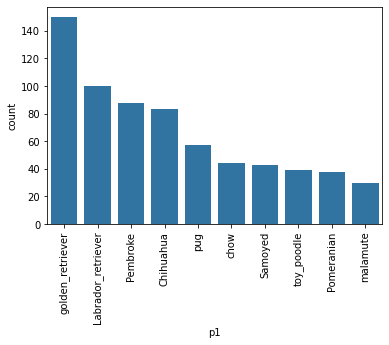

In [60]:
sb.countplot(x = 'p1', data = twitter_archive_master,  color = base_color, order = gen_order[:10]);
plt.xticks(rotation = 90);

In [63]:
# filtering data by rows where the algorithm's prediction is equal to or greater than 90% and the prediction is a 
# breed of dog and the tweet wasn't retweeted

filtered_df_1=twitter_archive_master.query('(p1_conf>=0.90) and  (p1_dog==True) and (retweeted==False)').copy()

In [64]:
gen_order = filtered_df_1['p1'].value_counts().index

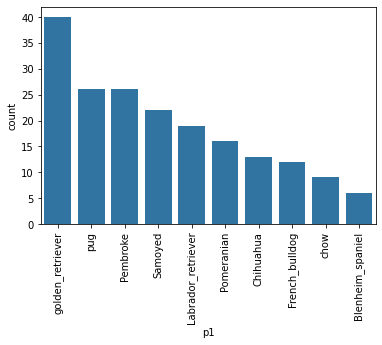

In [65]:
sb.countplot(x = 'p1', data = filtered_df_1,  color = base_color, order = gen_order[:10]);
plt.xticks(rotation = 90);

In [66]:
# filtering data by rows where the algorithm's prediction is equal to or greater than 85% and the prediction is a 
# breed of dog and the tweet wasn't retweeted

filtered_df_2=twitter_archive_master.query('(p1_conf>=0.85) and  (p1_dog==True) and (retweeted==False)').copy()

In [67]:
gen_order = filtered_df_2['p1'].value_counts().index

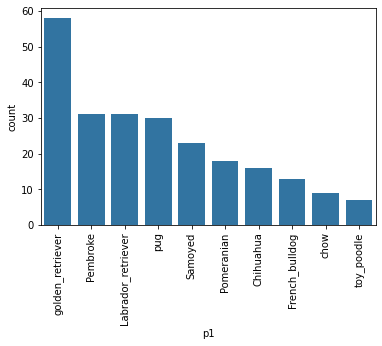

In [68]:
sb.countplot(x = 'p1', data = filtered_df_2,  color = base_color, order = gen_order[:10]);
plt.xticks(rotation = 90);

In [69]:
# filtering data by rows where the algorithm's prediction is equal to or greater than 80% and the prediction is a 
# breed of dog and the tweet wasn't retweeted

filtered_df_3=twitter_archive_master.query('(p1_conf>=0.80) and  (p1_dog==True) and (retweeted==False)').copy()

In [70]:
gen_order = filtered_df_3['p1'].value_counts().index

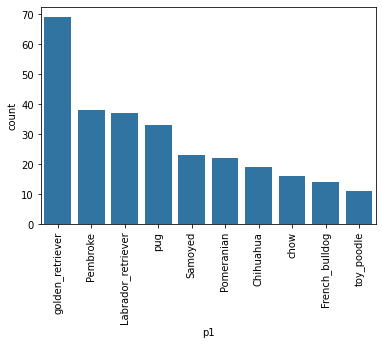

In [71]:
sb.countplot(x = 'p1', data = filtered_df_3,  color = base_color, order = gen_order[:10]);
plt.xticks(rotation = 90);